<a href="https://colab.research.google.com/github/Ziyi-star/Bachelor-Project/blob/main/notebooks/handlebar/LSTM/Lstm__Handlebar_best.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# For Vscode
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from datetime import datetime
from matplotlib import pyplot as plt
from matplotlib import dates as md
from sklearn.preprocessing import StandardScaler
import tensorflow as tf #building model

import sys
sys.path.append('../../../')   # Add parent directory to Python path
from utils.plots import *

df = pd.read_csv('../../../data/handlebar/test_data.csv')
# 0 for normal, 1 for abnormal
df['curb_scene'].value_counts()
#df.drop('Unnamed: 0', axis=1, inplace=True)
print(df.shape)
df.head()

(1864, 101)


,curb_scene,Acc-Z_1,Acc-Z_2,Acc-Z_3,Acc-Z_4,Acc-Z_5,Acc-Z_6,Acc-Z_7,Acc-Z_8,Acc-Z_9,...,Acc-Z_91,Acc-Z_92,Acc-Z_93,Acc-Z_94,Acc-Z_95,Acc-Z_96,Acc-Z_97,Acc-Z_98,Acc-Z_99,Acc-Z_100
0,0.0,6.014236,6.574478,8.231262,2.489975,10.520126,13.761871,20.930115,14.719559,8.082825,...,12.943054,6.157883,3.739746,5.161896,14.901504,7.862564,7.503433,6.938400,7.805099,14.020447
1,0.0,10.625473,11.286270,9.720459,9.725250,16.768997,18.435349,4.319138,4.965576,3.998321,...,11.310211,9.979034,9.888046,15.418655,10.007767,13.421890,10.184937,14.628571,13.886368,8.542511
2,0.0,8.628708,8.638275,8.628708,8.633499,8.623917,8.614334,8.619125,8.623917,8.638275,...,8.623917,8.633499,8.633499,8.619125,8.614334,8.619125,8.633499,8.623917,8.628708,8.623917
3,0.0,14.681244,19.019547,12.038040,3.150772,3.960007,12.191269,15.318100,10.496185,2.442093,...,3.912125,5.554550,17.520767,18.612518,13.019669,7.402878,6.976700,8.781937,13.589493,10.295074
4,0.0,8.236053,9.227249,8.930374,9.342178,9.251190,8.978256,9.332596,9.131485,9.447525,...,8.322250,8.188171,8.327026,8.264786,8.245636,8.283936,8.360550,8.480270,8.370132,8.374924


In [ ]:
# For Colab
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from datetime import datetime
from matplotlib import pyplot as plt
from matplotlib import dates as md
from sklearn.preprocessing import StandardScaler
import tensorflow as tf #building model

import os
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Project/data/processed_segments_overlap_50_more.csv')
# # 0 for normal, 1 for abnormal
df['curb_scene'].value_counts()
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,curb_scene,Acc-Z_1,Acc-Z_2,Acc-Z_3,Acc-Z_4,Acc-Z_5,Acc-Z_6,Acc-Z_7,Acc-Z_8,...,Acc-Z_91,Acc-Z_92,Acc-Z_93,Acc-Z_94,Acc-Z_95,Acc-Z_96,Acc-Z_97,Acc-Z_98,Acc-Z_99,Acc-Z_100
0,0,0.0,8.762772,8.753204,8.762772,8.781937,8.753204,8.748413,8.738831,8.748413,...,8.786728,8.801086,8.820236,8.786728,8.777145,8.772354,8.781937,8.801086,8.781937,8.753204
1,0,0.0,8.762772,8.762772,8.748413,8.767563,8.729263,8.695740,8.724472,8.767563,...,8.753204,8.772354,8.786728,8.781937,8.786728,8.777145,8.738831,8.820236,8.738831,8.757996
2,0,0.0,8.781937,8.796295,8.772354,8.772354,8.772354,8.786728,8.781937,8.801086,...,8.777145,8.753204,8.767563,8.762772,8.762772,8.753204,8.748413,8.762772,8.772354,8.767563
3,0,0.0,8.781937,8.753204,8.801086,8.753204,8.829819,8.753204,8.786728,8.815445,...,8.805878,8.796295,8.781937,8.801086,8.810669,8.796295,8.805878,8.791504,8.791504,8.772354
4,0,0.0,8.757996,8.762772,8.777145,8.767563,8.786728,8.777145,8.753204,8.757996,...,8.757996,8.757996,8.772354,8.767563,8.757996,8.743622,8.777145,8.743622,8.786728,8.796295


In [2]:
#scaling data, because neural network works better with scaled data
scaler = StandardScaler()
test_data_scaled = scaler.fit_transform(df.iloc[:, 1:])
#transform data
test_data_scaled.shape


(1864, 100)

In [3]:
# Convert the scaled data back to DataFrames for further processing
# takes all column names from the original DataFrame starting from index 1
test_data_scaled_df = pd.DataFrame(test_data_scaled, columns=df.columns[1:])
# Add the 'curb_scene', 'start_time', and 'end_time' columns back to the scaled DataFrames
test_data_scaled_df['curb_scene'] = df['curb_scene'].values
test_data_scaled_df.head()

,Acc-Z_1,Acc-Z_2,Acc-Z_3,Acc-Z_4,Acc-Z_5,Acc-Z_6,Acc-Z_7,Acc-Z_8,Acc-Z_9,Acc-Z_10,...,Acc-Z_92,Acc-Z_93,Acc-Z_94,Acc-Z_95,Acc-Z_96,Acc-Z_97,Acc-Z_98,Acc-Z_99,Acc-Z_100,curb_scene
0,-0.461587,-0.410612,-0.132221,-0.957974,0.258199,0.718235,1.632769,0.811774,-0.109099,-0.305034,...,-0.512635,-1.019690,-0.737204,1.142497,-0.207988,-0.259594,-0.313599,-0.184571,0.766534,0.0
1,0.194114,0.277704,0.070610,0.099443,1.221663,1.407811,-0.634192,-0.561663,-0.716823,-0.625560,...,0.219643,0.204048,1.302462,0.219135,0.825593,0.213173,0.965459,0.843917,-0.073200,0.0
2,-0.089819,-0.109125,-0.078088,-0.060113,-0.034162,-0.041288,-0.047357,-0.046540,-0.026455,-0.055384,...,-0.038213,-0.045653,-0.049697,-0.043782,-0.067329,-0.060356,-0.033257,-0.045279,-0.060721,0.0
3,0.770831,1.407409,0.386268,-0.861400,-0.753253,0.486491,0.866877,0.217090,-0.948370,-0.297944,...,-0.628257,1.723240,1.937596,0.787428,-0.293452,-0.352461,-0.006975,0.793708,0.195457,0.0
4,-0.145653,-0.023086,-0.037001,0.043458,0.062552,0.012409,0.050013,0.024930,0.093952,0.124962,...,-0.123555,-0.106653,-0.120161,-0.113349,-0.129647,-0.108479,-0.057149,-0.089010,-0.098890,0.0


In [4]:
# Filter and slice the data
normal_test_data_scaled = test_data_scaled_df[test_data_scaled_df['curb_scene'] == 0.0].iloc[:, :-1]
abnormal_test_data_scaled = test_data_scaled_df[test_data_scaled_df['curb_scene'] == 1.0].iloc[:, :-1]
normal_test_data_scaled.shape, abnormal_test_data_scaled.shape

((1796, 100), (68, 100))

In [5]:
# Cast to float32
normal_test_data_scaled = normal_test_data_scaled.astype("float32")
abnormal_test_data_scaled = abnormal_test_data_scaled.astype("float32")
normal_test_data_scaled.shape, abnormal_test_data_scaled.shape

((1796, 100), (68, 100))

In [6]:
# Reshape the data for LSTM input((samples, timesteps, features)
normal_test_data_scaled_lstm = np.expand_dims(normal_test_data_scaled, axis=1)
abnormal_test_data_scaled_lstm = np.expand_dims(abnormal_test_data_scaled, axis=1)
normal_test_data_scaled_lstm.shape, abnormal_test_data_scaled_lstm.shape

((1796, 1, 100), (68, 1, 100))

In [7]:
load_model = tf.keras.models.load_model('../../../models/lstm_autoencoder_best.keras')

In [8]:
import json
# Verify the saved data
with open('../../../models/lstm_thresholds.json', 'r') as f:
    loaded_thresholds = json.load(f)
print("Saved thresholds:", loaded_thresholds)

Saved thresholds: {'low_threshold': 0.197, 'middle_threshold': 0.37674182653427124, 'high_threshold': 0.6914749145507812}


In [9]:
# Get reconstruction errors for test data
reconstructions_normal_test = load_model.predict(normal_test_data_scaled_lstm)
reconstructions_abnormal_test = load_model.predict(abnormal_test_data_scaled_lstm)

# Calculate MAE losses
test_loss_normal = tf.keras.losses.mae(reconstructions_normal_test, normal_test_data_scaled_lstm)
test_loss_abnormal = tf.keras.losses.mae(reconstructions_abnormal_test, abnormal_test_data_scaled_lstm)

# Flatten the loss arrays for easier processing
test_loss_normal_flat = test_loss_normal.numpy().flatten()
test_loss_abnormal_flat = test_loss_abnormal.numpy().flatten()

#minimum
min_loss_abnormal = min(test_loss_abnormal_flat)
print(min_loss_abnormal)

57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
0.19784732



Results for low_threshold (0.1970)


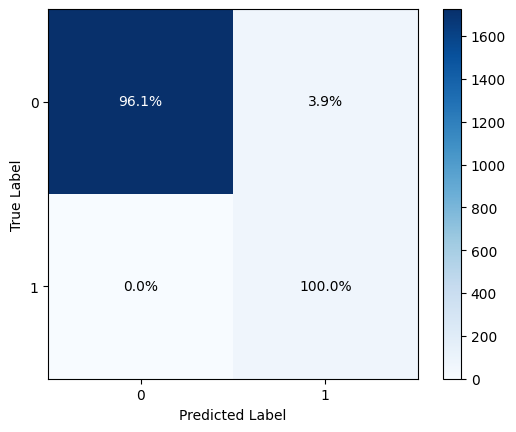

              precision    recall  f1-score   support

  Normal (0)      1.000     0.961     0.980      1796
Abnormal (1)      0.493     1.000     0.660        68

    accuracy                          0.962      1864
   macro avg      0.746     0.981     0.820      1864
weighted avg      0.981     0.962     0.968      1864


Results for middle_threshold (0.3767)


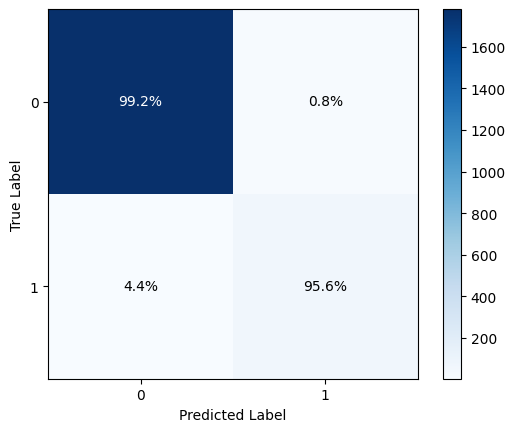

              precision    recall  f1-score   support

  Normal (0)      0.998     0.992     0.995      1796
Abnormal (1)      0.823     0.956     0.884        68

    accuracy                          0.991      1864
   macro avg      0.911     0.974     0.940      1864
weighted avg      0.992     0.991     0.991      1864


Results for high_threshold (0.6915)


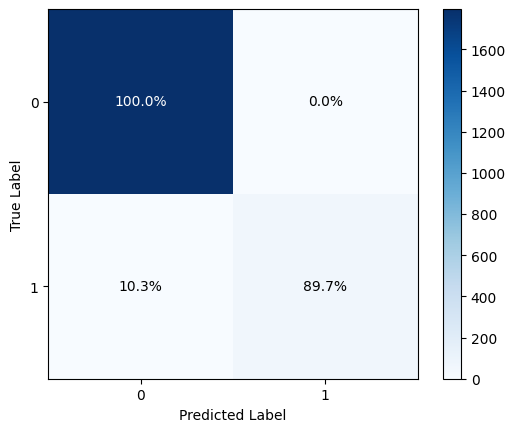

              precision    recall  f1-score   support

  Normal (0)      0.996     1.000     0.998      1796
Abnormal (1)      1.000     0.897     0.946        68

    accuracy                          0.996      1864
   macro avg      0.998     0.949     0.972      1864
weighted avg      0.996     0.996     0.996      1864



In [10]:
# Combine test losses and create true labels
all_test_losses = np.concatenate([test_loss_normal.numpy(), test_loss_abnormal.numpy()])
true_labels = np.concatenate([np.zeros(len(test_loss_normal)), np.ones(len(test_loss_abnormal))])

# Make predictions using each threshold
for threshold_name, threshold_value in loaded_thresholds.items():
    print(f"\nResults for {threshold_name} ({threshold_value:.4f})")
    predictions = (all_test_losses > threshold_value).astype(int)
    plot_confusion_matrix(true_labels, predictions)